In [1]:
from MDP import MountainCar, CartPole
from RLAlgorithms import ESGNStepSARSA, TrueOnlineSARSALambda
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
num_trials = 20
cp = CartPole()

for M in range(3,28,5):
    alg = ESGNStepSARSA(cp, M=10, n=5)
    Gs = np.zeros(alg.num_episodes)

    for _ in range(num_trials):
        alg.reset()
        Gs += np.array(alg.run())

    Gs /= num_trials

    plt.clf()
    plt.plot(range(len(Gs)), Gs)
    plt.savefig(f'experiments/nStepSARSA/CartPole/alpha-{alpha}-{approach}.png', facecolor='white')

  0%|          | 9/2000 [00:00<00:23, 84.42it/s]

alpha: 0.5


  5%|▍         | 92/2000 [00:00<00:11, 162.05it/s]/Users/irishlad98/Documents/classes/cs687/Final Project/RL-final-project/RLAlgorithms.py:118: RuntimeWarning: invalid value encountered in double_scalars
  update = self.alpha*(G - self.qhat(states[tau], actions[tau])) * self.x(states[tau])
  2%|▏         | 39/2000 [00:00<00:10, 188.80it/s]

alpha: 0.35


  1%|▏         | 29/2000 [00:00<00:14, 140.03it/s]

alpha: 0.1


  2%|▏         | 30/2000 [00:00<00:13, 144.13it/s]

alpha: 0.01


  1%|          | 19/2000 [00:00<00:10, 189.32it/s]

alpha: 0.001


  2%|▏         | 36/2000 [00:00<00:11, 176.28it/s]

alpha: 0.5


  4%|▍         | 88/2000 [00:00<00:11, 170.09it/s]/Users/irishlad98/Documents/classes/cs687/Final Project/RL-final-project/RLAlgorithms.py:118: RuntimeWarning: invalid value encountered in double_scalars
  update = self.alpha*(G - self.qhat(states[tau], actions[tau])) * self.x(states[tau])
  1%|          | 20/2000 [00:00<00:10, 195.84it/s]

alpha: 0.35


  1%|▏         | 28/2000 [00:00<00:16, 120.23it/s]

alpha: 0.1


  2%|▏         | 41/2000 [00:00<00:09, 201.64it/s]

alpha: 0.01


  1%|          | 20/2000 [00:00<00:09, 199.54it/s]

alpha: 0.001


100%|██████████| 2000/2000 [00:13<00:00, 145.38it/s]


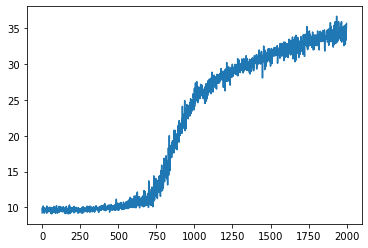

In [3]:
num_trials = 20
cp = CartPole()

for approach in ['epsilon-greedy', 'softmax']:
    for alpha in [0.5, 0.35, 0.1, 0.01, 0.001]:
        print('alpha:', alpha)
        alg = ESGNStepSARSA(cp, M=10, n=5, alpha=alpha, epsilon=0.1, approach=approach)
        Gs = np.zeros(alg.num_episodes)

        for _ in range(num_trials):
            alg.reset()
            Gs += np.array(alg.run())

        Gs /= num_trials

        plt.clf()
        plt.plot(range(len(Gs)), Gs)
        plt.savefig(f'experiments/nStepSARSA/CartPole/alpha-{alpha}-{approach}.png', facecolor='white')